In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import fastparquet
import geopandas as gpd
import plotly.express as px
import os
import sys
sys.path.append('C:/Users/thu-bao/Bachelorarbeit/3_Code/NYC_Yellow_Cab_Fare_Prediction/6_Helper_Function')
import Target_Binning
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

In [2]:
%matplotlib inline
pd.set_option('display.max_columns', None)

### Load NYC Preprocessed Tripdata

In [3]:
path="F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/6_Preprocessed_Data/Trip_weather_holiday_data.parquet"
# Testing the Parquet Files
trip_weather_holiday_data=pd.read_parquet(path=path,engine="fastparquet")
trip_weather_holiday_data.head()

,Pickup_DateTime,Pickup_Lon,Pickup_Lat,Fare_Amt,zone_pickup,borough_pickup,Pickup_Year,Pickup_Month,Pickup_Day,Pickup_Weekday,Pickup_Hour,Pickup_Is_Area_Lower_Midtown_Manhattan,Distance_to_Time_Square,Distance_to_Wall_Street,Distance_to_Manhattan_Mall,Distance_to_JFK_Airport,Distance_to_Newark_Airport,Distance_to_LaGuardia_Airport,Distance_to_Brooklyn_Bridge,Distance_to_Park_Slope,AWND,PRCP,SNOW,SNWD,Fog,Heavy_Fog,Thunder,Ice_Pellets,Hail,Glaze,Dust,Smoke,Blowing_Snow,High_Wind,Mist,Drizzle,Rain,Freezing_Rain,Snow,Unkown,Ice_Fog,Holiday,TAVG,Season,Weekday,Weekend,Time_Of_Day,Rush_Hour
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
110742,2009-01-01 00:15:31,-73.961845,40.800648,13.496094,Bloomingdale,Manhattan,2009,1,1,Thursday,0,False,3.053718,6.981398,3.780356,14.615350,13.540560,4.899022,6.786808,9.071424,11.179688,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,20.5,Winter,True,False,Night,False
107744,2009-01-01 00:18:28,-73.975883,40.775955,8.251953,Central Park,Manhattan,2009,1,1,Thursday,0,True,1.194600,5.124758,1.921561,13.918916,12.008470,5.345164,4.949886,7.312343,11.179688,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,20.5,Winter,True,False,Night,False
210569,2009-01-01 00:19:58,-73.959457,40.767616,5.699219,Lenox Hill West,Manhattan,2009,1,1,Thursday,0,True,1.409835,4.973970,1.976006,12.893703,12.503596,4.528005,4.679853,6.825408,11.179688,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,20.5,Winter,True,False,Night,False
241310,2009-01-01 00:20:22,-73.992119,40.748291,9.000000,Penn Station/Madison Sq West,Manhattan,2009,1,1,Thursday,0,True,0.901386,3.040526,0.195555,13.427514,10.394043,6.499420,2.923195,5.424405,11.179688,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,20.5,Winter,True,False,Night,False
123511,2009-01-01 00:20:27,-73.979027,40.777214,3.499756,Lincoln Square East,Manhattan,2009,1,1,Thursday,0,False,1.227895,5.154375,1.951321,14.099898,11.909502,5.509978,5.001230,7.394941,11.179688,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,20.5,Winter,True,False,Night,False


In [4]:
trip_weather_holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1895378 entries, 110742 to 1886758
Data columns (total 48 columns):
Pickup_DateTime                           datetime64[ns]
Pickup_Lon                                float32
Pickup_Lat                                float32
Fare_Amt                                  float32
zone_pickup                               object
borough_pickup                            object
Pickup_Year                               int64
Pickup_Month                              int64
Pickup_Day                                int64
Pickup_Weekday                            object
Pickup_Hour                               int64
Pickup_Is_Area_Lower_Midtown_Manhattan    bool
Distance_to_Time_Square                   float32
Distance_to_Wall_Street                   float32
Distance_to_Manhattan_Mall                float32
Distance_to_JFK_Airport                   float32
Distance_to_Newark_Airport                float32
Distance_to_LaGuardia_Airport          

In [5]:
trip_weather_holiday_data.describe()

,Pickup_Lon,Pickup_Lat,Fare_Amt,Pickup_Year,Pickup_Month,Pickup_Day,Pickup_Hour,Distance_to_Time_Square,Distance_to_Wall_Street,Distance_to_Manhattan_Mall,Distance_to_JFK_Airport,Distance_to_Newark_Airport,Distance_to_LaGuardia_Airport,Distance_to_Brooklyn_Bridge,Distance_to_Park_Slope,AWND,PRCP,SNOW,SNWD,TAVG
count,1.895378e+06,1.895378e+06,1.895378e+06,1.895378e+06,1.895378e+06,1.895378e+06,1.895378e+06,1.895378e+06,1.895378e+06,1.895378e+06,1.895378e+06,1.895378e+06,1.895378e+06,1.895378e+06,1.895378e+06,1.895378e+06,1.895378e+06,1.895378e+06,1.895378e+06,1.895378e+06
mean,-7.397546e+01,4.075098e+01,1.151458e+01,2.012518e+03,6.089221e+00,1.570399e+01,1.354091e+01,1.893854e+00,3.860410e+00,1.874390e+00,1.294652e+01,1.139248e+01,5.983004e+00,3.674799e+00,5.904994e+00,5.717916e+00,1.292561e-01,8.727854e-02,6.072271e-01,5.516673e+01
std,3.409396e-02,2.659778e-02,8.876041e+00,2.296767e+00,3.416765e+00,8.689029e+00,6.494854e+00,1.895075e+00,2.080974e+00,1.894287e+00,1.796260e+00,1.956525e+00,1.510667e+00,1.984589e+00,1.714679e+00,2.456567e+00,3.688620e-01,7.481321e-01,2.480028e+00,1.722688e+01
min,-7.423065e+01,4.051488e+01,3.000063e+00,2.009000e+03,1.000000e+00,1.000000e+00,0.000000e+00,3.578496e-04,1.971941e-03,1.185399e-03,6.549491e-02,3.655991e+00,1.483208e-02,1.766925e-01,3.679422e-02,2.199707e-01,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00
25%,-7.399225e+01,4.073677e+01,6.101562e+00,2.011000e+03,3.000000e+00,8.000000e+00,9.000000e+00,8.000036e-01,2.444438e+00,8.208534e-01,1.278521e+01,1.019033e+01,5.223443e+00,2.319412e+00,4.756336e+00,4.031250e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.150000e+01
50%,-7.398211e+01,4.075345e+01,8.525391e+00,2.013000e+03,6.000000e+00,1.600000e+01,1.400000e+01,1.478056e+00,3.679762e+00,1.363149e+00,1.316926e+01,1.108711e+01,5.983440e+00,3.497321e+00,5.881387e+00,5.371094e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.600000e+01
75%,-7.396842e+01,4.076770e+01,1.300000e+01,2.015000e+03,9.000000e+00,2.300000e+01,1.900000e+01,2.301578e+00,4.916291e+00,2.320343e+00,1.359683e+01,1.211171e+01,6.845520e+00,4.684134e+00,6.907569e+00,6.929688e+00,4.000854e-02,0.000000e+00,0.000000e+00,7.000000e+01
max,-7.371025e+01,4.091128e+01,1.220000e+02,2.016000e+03,1.200000e+01,3.100000e+01,2.300000e+01,2.131684e+01,1.763034e+01,2.062243e+01,2.534257e+01,2.461615e+01,2.604798e+01,1.805014e+01,1.731896e+01,2.281250e+01,5.808594e+00,2.729688e+01,2.300000e+01,9.400000e+01


In [6]:
# Checking Entries of WT01-WT22 if too many Values are same doens't matter for Machine Learning Model
trip_weather_holiday_data["Rain"].value_counts()

False    1524815
True      370563
Name: Rain, dtype: int64

In [7]:
trip_weather_holiday_data["Freezing_Rain"].value_counts()

False    1890636
True        4742
Name: Freezing_Rain, dtype: int64

In [8]:
trip_weather_holiday_data["Fog"].value_counts()

False    1344611
True      550767
Name: Fog, dtype: int64

In [9]:
trip_weather_holiday_data["Heavy_Fog"].value_counts()

False    1841006
True       54372
Name: Heavy_Fog, dtype: int64

In [10]:
trip_weather_holiday_data["Snow"].value_counts()

False    1828903
True       66475
Name: Snow, dtype: int64

In [11]:
trip_weather_holiday_data["Blowing_Snow"].value_counts()

False    1887699
True        7679
Name: Blowing_Snow, dtype: int64

In [12]:
trip_weather_holiday_data["Thunder"].value_counts()

False    1895378
Name: Thunder, dtype: int64

In [13]:
trip_weather_holiday_data["Ice_Pellets"].value_counts()

False    1892314
True        3064
Name: Ice_Pellets, dtype: int64

In [14]:
trip_weather_holiday_data["Hail"].value_counts()

False    1762585
True      132793
Name: Hail, dtype: int64

In [15]:
trip_weather_holiday_data["Glaze"].value_counts()

False    1891513
True        3865
Name: Glaze, dtype: int64

In [16]:
trip_weather_holiday_data["Dust"].value_counts()

False    1862752
True       32626
Name: Dust, dtype: int64

In [17]:
trip_weather_holiday_data["Smoke"].value_counts()

False    1548179
True      347199
Name: Smoke, dtype: int64

In [18]:
trip_weather_holiday_data["High_Wind"].value_counts()

False    1894690
True         688
Name: High_Wind, dtype: int64

In [19]:
trip_weather_holiday_data["Mist"].value_counts()

False    1547382
True      347996
Name: Mist, dtype: int64

In [20]:
trip_weather_holiday_data["Drizzle"].value_counts()

False    1894743
True         635
Name: Drizzle, dtype: int64

In [21]:
trip_weather_holiday_data["Unkown"].value_counts()

False    1869459
True       25919
Name: Unkown, dtype: int64

In [22]:
trip_weather_holiday_data["Ice_Fog"].value_counts()

False    1883577
True       11801
Name: Ice_Fog, dtype: int64

In [23]:
# Decision drop Thunder Column, because just False Entry
trip_weather_holiday_data.drop(columns=['Thunder'],inplace=True)

### Binning Target Variable into 11 Cluster
#### with K-Means

In [24]:
# use unsupervised learning method k-means to bin Target Variable
trip_weather_holiday_data=Target_Binning.KMeans_Binning(trip_weather_holiday_data,11)

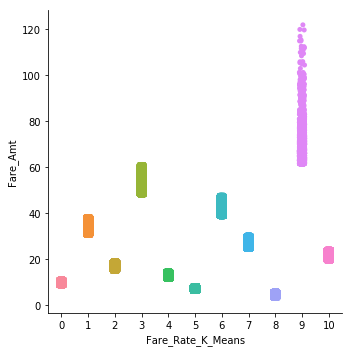

In [25]:
# Show Distribution of the Bins of Target
sns.catplot(x="Fare_Rate_K_Means", y="Fare_Amt", data=trip_weather_holiday_data);

In [26]:
category_8=trip_weather_holiday_data.loc[(trip_weather_holiday_data["Fare_Rate_K_Means"]==8)]["Fare_Amt"]
category_8.min()

3.0000627

In [27]:
category_8.max()

5.913148

In [28]:
category_5=trip_weather_holiday_data.loc[(trip_weather_holiday_data["Fare_Rate_K_Means"]==5)]["Fare_Amt"]
category_5.min()

5.9140196

In [29]:
category_5.max()

8.318098

In [30]:
category_0=trip_weather_holiday_data.loc[(trip_weather_holiday_data["Fare_Rate_K_Means"]==0)]["Fare_Amt"]
category_0.min()

8.318869

In [31]:
category_0.max()

11.188622

In [32]:
category_4=trip_weather_holiday_data.loc[(trip_weather_holiday_data["Fare_Rate_K_Means"]==4)]["Fare_Amt"]
category_4.min()

11.190992

In [33]:
category_4.max()

14.720112

In [34]:
category_2=trip_weather_holiday_data.loc[(trip_weather_holiday_data["Fare_Rate_K_Means"]==2)]["Fare_Amt"]
category_2.min()

14.7265625

In [35]:
category_2.max()

19.072266

In [36]:
category_10=trip_weather_holiday_data.loc[(trip_weather_holiday_data["Fare_Rate_K_Means"]==10)]["Fare_Amt"]
category_10.min()

19.085953

In [37]:
category_10.max()

24.218952

In [38]:
category_7=trip_weather_holiday_data.loc[(trip_weather_holiday_data["Fare_Rate_K_Means"]==7)]["Fare_Amt"]
category_7.min()

24.25299

In [39]:
category_7.max()

30.292969

In [40]:
category_1=trip_weather_holiday_data.loc[(trip_weather_holiday_data["Fare_Rate_K_Means"]==1)]["Fare_Amt"]
category_1.min()

30.332031

In [41]:
category_1.max()

38.45703

In [42]:
category_6=trip_weather_holiday_data.loc[(trip_weather_holiday_data["Fare_Rate_K_Means"]==6)]["Fare_Amt"]
category_6.min()

38.476562

In [43]:
category_6.max()

47.734375

In [44]:
category_3=trip_weather_holiday_data.loc[(trip_weather_holiday_data["Fare_Rate_K_Means"]==3)]["Fare_Amt"]
category_3.min()

47.8125

In [45]:
category_3.max()

61.171875

In [46]:
category_9=trip_weather_holiday_data.loc[(trip_weather_holiday_data["Fare_Rate_K_Means"]==9)]["Fare_Amt"]
category_9.min()

61.289062

In [47]:
category_9.max()

122.0

#### The Clustering optimal, because there are more smaller Fare Amounts so the Distribution is better

#### Use my own Binning, because Float doesn't matter

In [48]:
# use unsupervised learning method k-means to bin Target Variable
trip_weather_holiday_data=Target_Binning.own_binning_target(trip_weather_holiday_data,category_8.min()-0.1,category_9.max())

### Distribution of Fare-Rate

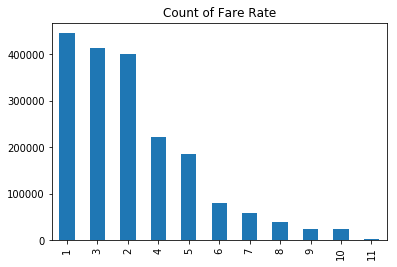

In [49]:
plt.title('Count of Fare Rate')
trip_weather_holiday_data["Fare_Rate"].value_counts().plot.bar()

In [50]:
print(str(len(trip_weather_holiday_data.loc[(trip_weather_holiday_data["Fare_Rate"]==1)])/len(trip_weather_holiday_data)*100))
print(str(len(trip_weather_holiday_data.loc[(trip_weather_holiday_data["Fare_Rate"]==2)])/len(trip_weather_holiday_data)*100))
print(str(len(trip_weather_holiday_data.loc[(trip_weather_holiday_data["Fare_Rate"]==3)])/len(trip_weather_holiday_data)*100))
print(str(len(trip_weather_holiday_data.loc[(trip_weather_holiday_data["Fare_Rate"]==4)])/len(trip_weather_holiday_data)*100))
print(str(len(trip_weather_holiday_data.loc[(trip_weather_holiday_data["Fare_Rate"]==5)])/len(trip_weather_holiday_data)*100))
print(str(len(trip_weather_holiday_data.loc[(trip_weather_holiday_data["Fare_Rate"]==6)])/len(trip_weather_holiday_data)*100))
print(str(len(trip_weather_holiday_data.loc[(trip_weather_holiday_data["Fare_Rate"]==7)])/len(trip_weather_holiday_data)*100))
print(str(len(trip_weather_holiday_data.loc[(trip_weather_holiday_data["Fare_Rate"]==8)])/len(trip_weather_holiday_data)*100))
print(str(len(trip_weather_holiday_data.loc[(trip_weather_holiday_data["Fare_Rate"]==9)])/len(trip_weather_holiday_data)*100))
print(str(len(trip_weather_holiday_data.loc[(trip_weather_holiday_data["Fare_Rate"]==10)])/len(trip_weather_holiday_data)*100))
print(str(len(trip_weather_holiday_data.loc[(trip_weather_holiday_data["Fare_Rate"]==11)])/len(trip_weather_holiday_data)*100))

23.525966851994696
21.118162181897226
21.840762106556053
11.701940193460091
9.72080503203055
4.2319262964960025
3.114734897207839
2.0193333466991805
1.3023259740273443
1.3021149343297223
0.12192818530129611


In [51]:
trip_weather_holiday_data["Fare_Rate"].value_counts()

1     445906
3     413965
2     400269
4     221796
5     184246
6      80211
7      59036
8      38274
9      24684
10     24680
11      2311
Name: Fare_Rate, dtype: int64

#### Observation:
#### There is a Class Imbalance

### Without Feature Engineering
#### Pickup_Datetime, Pickup Lon, Pickup Lat, Passenger_Count, Dropoff Lon, Dropoff Lat, Fare_Rate

In [52]:
df_without_Feature_Engineering=trip_weather_holiday_data[["Pickup_DateTime","Pickup_Lon","Pickup_Lat","Fare_Rate"]]

In [53]:
# Turn Fare Rate into uint8 for Heatmap
df_without_Feature_Engineering[["Fare_Rate"]] = df_without_Feature_Engineering[["Fare_Rate"]].astype('uint8')

c:\users\thu-bao\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [54]:
df_without_Feature_Engineering['Pickup_DateTime']=(df_without_Feature_Engineering['Pickup_DateTime'] - dt.datetime(1970,1,1)).dt.total_seconds()

c:\users\thu-bao\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [55]:
df_without_Feature_Engineering["Pickup_DateTime"].value_counts()

1.395438e+09    6
1.359450e+09    6
1.366393e+09    5
1.314214e+09    5
1.395165e+09    5
1.255729e+09    5
1.328384e+09    5
1.302633e+09    5
1.245545e+09    5
1.374369e+09    5
1.292868e+09    5
1.395844e+09    5
1.402445e+09    5
1.244063e+09    5
1.266861e+09    5
1.310985e+09    5
1.349295e+09    5
1.348949e+09    5
1.278182e+09    5
1.276883e+09    5
1.269437e+09    5
1.359659e+09    5
1.333851e+09    5
1.411724e+09    5
1.300698e+09    5
1.360139e+09    5
1.338580e+09    5
1.350900e+09    5
1.386685e+09    5
1.307793e+09    5
               ..
1.408399e+09    1
1.408402e+09    1
1.408404e+09    1
1.408352e+09    1
1.408350e+09    1
1.408348e+09    1
1.408320e+09    1
1.408301e+09    1
1.408302e+09    1
1.408305e+09    1
1.408307e+09    1
1.408307e+09    1
1.408309e+09    1
1.408312e+09    1
1.408314e+09    1
1.408316e+09    1
1.408319e+09    1
1.408323e+09    1
1.408345e+09    1
1.408325e+09    1
1.294028e+09    1
1.408330e+09    1
1.408332e+09    1
1.408333e+09    1
1.408334e+

Text(0.5, 1.0, 'Correlation Matrix of Fare Rate and all Features')

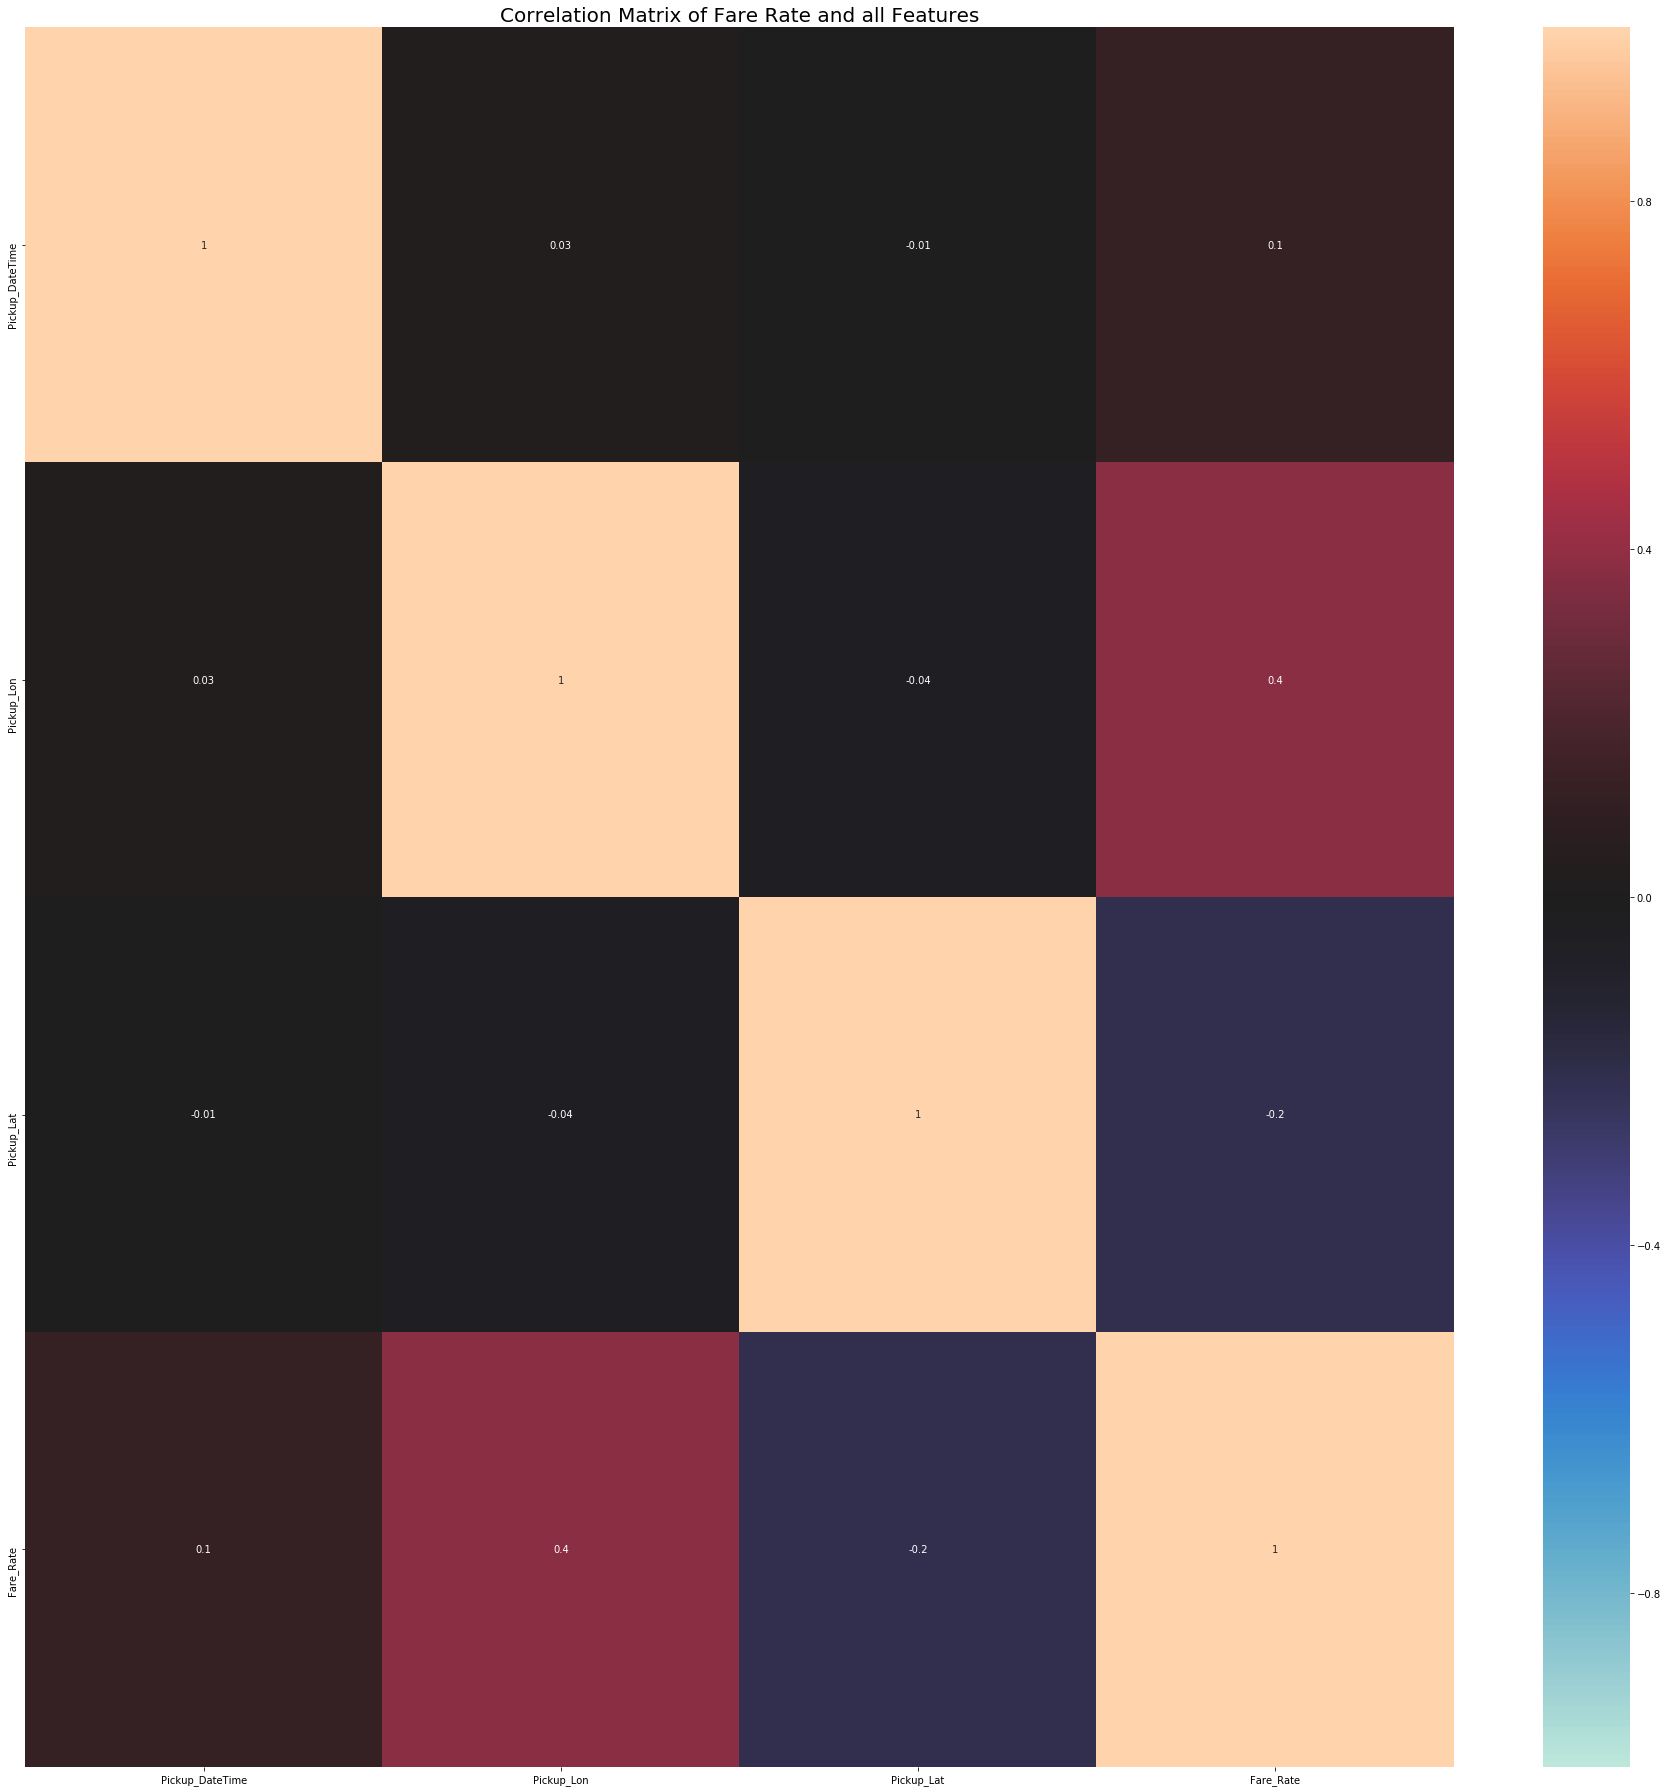

In [56]:
# Plot Heatmap
plt.figure(figsize=(32,32))
corr = sns.heatmap(df_without_Feature_Engineering.corr(), annot = True, vmin=-1, vmax=1, center=0.0, fmt='.1g')
plt.title('Correlation Matrix of Fare Rate and all Features',fontsize=20)

In [57]:
# Drop Pickup_DateTime from trip_weather_holiday_data
trip_weather_holiday_data.drop(columns=["Pickup_DateTime"],inplace=True)

In [ ]:
x=df_without_Feature_Engineering.drop(["Fare_Rate"], axis=1)
y=df_without_Feature_Engineering["Fare_Rate"]

In [ ]:
#Shuffle=True
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
len(X_train)

In [ ]:
len(y_train)

In [ ]:
len(X_test)

In [ ]:
len(y_test)

In [ ]:
y_train.value_counts()

In [ ]:
# Resampling Training Dataset
X_undersampled,y_undersampled=Resampling.random_undersample(X_train,y_train)
X_oversampled,y_oversampled=Resampling.random_oversample(X_train,y_train)

In [ ]:
Counter(y_undersampled)

In [ ]:
Counter(y_oversampled)

In [58]:
# Convert to parquet for quick reloading
# Set Path for Parquet Files
path="F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/7_Transformed_Data"
df_without_Feature_Engineering.to_parquet(os.path.join(path, "Without_Feature_Engineering" + "." + "parquet"),engine="fastparquet")

### With Feature Engineering and With External Data

| Column         | Pickup_Year      | Pickup_Month     | Season           | Pickup_Day       | Pickup_Weekday   | Weekday              | Weekend              | Pickup_Hour      | Time_Of_Day      | Rush_Hour            | Holiday              | Pickup_Lon        | Pickup_Lat         | borough_pickup   | zone_pickup      | Dropoff_Lon        | Dropoff_Lat        | borough_dropoff  | zone_dropoff     | Trip_Distance      | Manhattan_JFK_Airport_Trip | Is_Destination_Newark_Airport | Is_Destination_LaGuardia_Airport | Is_Origin_LaGuardia_Airport | Pickup_Is_Area_Lower_Midtown_Manhattan | Dropoff_Is_Area_Lower_Midtown_Manhattan | Passenger_Count  | AWND               | PRCP               | SNOW               | SNWD               | TAVG               | Fog                  | Heavy_Fog            | Thunder              | Ice_Pellets          | Hail                 | Glaze                | Dust                 | Smoke                | Blowing_Snow         | High_Wind            | Mist                 | Drizzle              | Rain                 | Freezing_Rain        | Snow                 | Unkown               | Ice_Fog              | Fare_Rate |
|----------------|------------------|------------------|------------------|------------------|------------------|----------------------|----------------------|------------------|------------------|----------------------|----------------------|-------------------|--------------------|------------------|------------------|--------------------|--------------------|------------------|------------------|--------------------|----------------------------|-------------------------------|----------------------------------|-----------------------------|----------------------------------------|-----------------------------------------|------------------|--------------------|--------------------|--------------------|--------------------|--------------------|----------------------|----------------------|----------------------|----------------------|----------------------|----------------------|----------------------|----------------------|----------------------|----------------------|----------------------|----------------------|----------------------|----------------------|----------------------|----------------------|----------------------|-----------|
| Datatype       |      Nominal     |      Nominal     | Nominal          |      Nominal     |      Nominal     | Nominal, dichotomous | Nominal, dichotomous |      Nominal     |      Nominal     | Nominal, dichotomous | Nominal, dichotomous | Metric continuous | Metric, continuous |      Nominal     |      Nominal     | Metric, continuous | Metric, continuous |      Nominal     |      Nominal     | Metric, continuous |    Nominal, dichotomous    |      Nominal, dichotomous     |       Nominal, dichotomous       |     Nominal, dichotomous    |          Nominal, dichotomous          |           Nominal, dichotomous          | Metric, discrete | Metric, continuous | Metric, continuous | Metric, continuous | Metric, continuous | Metric, continuous | Nominal, dichotomous | Nominal, dichotomous | Nominal, dichotomous | Nominal, dichotomous | Nominal, dichotomous | Nominal, dichotomous | Nominal, dichotomous | Nominal, dichotomous | Nominal, dichotomous | Nominal, dichotomous | Nominal, dichotomous | Nominal, dichotomous | Nominal, dichotomous | Nominal, dichotomous | Nominal, dichotomous | Nominal, dichotomous | Nominal, dichotomous |  Ordinal  |
| Transformation | One-Hot-Encoding | One-Hot-Encoding | One-Hot-Encoding | One-Hot-Encoding | One-Hot-Encoding | One-Hot-Encoding     | One-Hot-Encoding     | One-Hot-Encoding | One-Hot-Encoding | One-Hot-Encoding     | One-Hot-Encoding     | Scaling           | Scaling            | One-Hot-Encoding | One-Hot-Encoding | Scaling            | Scaling            | One-Hot-Encoding | One-Hot-Encoding | Scaling            |      One-Hot-Encoding      |        One-Hot-Encoding       |         One-Hot-Encoding         |       One-Hot-Encoding      |            One-Hot-Encoding            |             One-Hot-Encoding            | Scaling          | Scaling            | Scaling            | Scaling            | Scaling            | Scaling            | One-Hot-Encoding     | One-Hot-Encoding     | One-Hot-Encoding     | One-Hot-Encoding     | One-Hot-Encoding     | One-Hot-Encoding     | One-Hot-Encoding     | One-Hot-Encoding     | One-Hot-Encoding     | One-Hot-Encoding     | One-Hot-Encoding     | One-Hot-Encoding     | One-Hot-Encoding     | One-Hot-Encoding     | One-Hot-Encoding     | One-Hot-Encoding     | One-Hot-Encoding     | On-Hot-Encoding   |

In [59]:
# Turn Fare Rate into uint8 for Heatmap
trip_weather_holiday_data[["Fare_Rate"]] = trip_weather_holiday_data[["Fare_Rate"]].astype('uint8')

In [60]:
trip_weather_holiday_data[["Pickup_Year","Pickup_Month","Season","Pickup_Day","Pickup_Weekday","Pickup_Hour","Time_Of_Day","zone_pickup","borough_pickup"]] = trip_weather_holiday_data[["Pickup_Year","Pickup_Month","Season","Pickup_Day","Pickup_Weekday","Pickup_Hour","Time_Of_Day","zone_pickup","borough_pickup"]].astype('category')

In [61]:
trip_weather_holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1895378 entries, 110742 to 1886758
Data columns (total 46 columns):
Pickup_Lon                                float32
Pickup_Lat                                float32
zone_pickup                               category
borough_pickup                            category
Pickup_Year                               category
Pickup_Month                              category
Pickup_Day                                category
Pickup_Weekday                            category
Pickup_Hour                               category
Pickup_Is_Area_Lower_Midtown_Manhattan    bool
Distance_to_Time_Square                   float32
Distance_to_Wall_Street                   float32
Distance_to_Manhattan_Mall                float32
Distance_to_JFK_Airport                   float32
Distance_to_Newark_Airport                float32
Distance_to_LaGuardia_Airport             float32
Distance_to_Brooklyn_Bridge               float32
Distance_to_Park_Slope      

Text(0.5, 1.0, 'Correlation Matrix of Fare Rate and all Features')

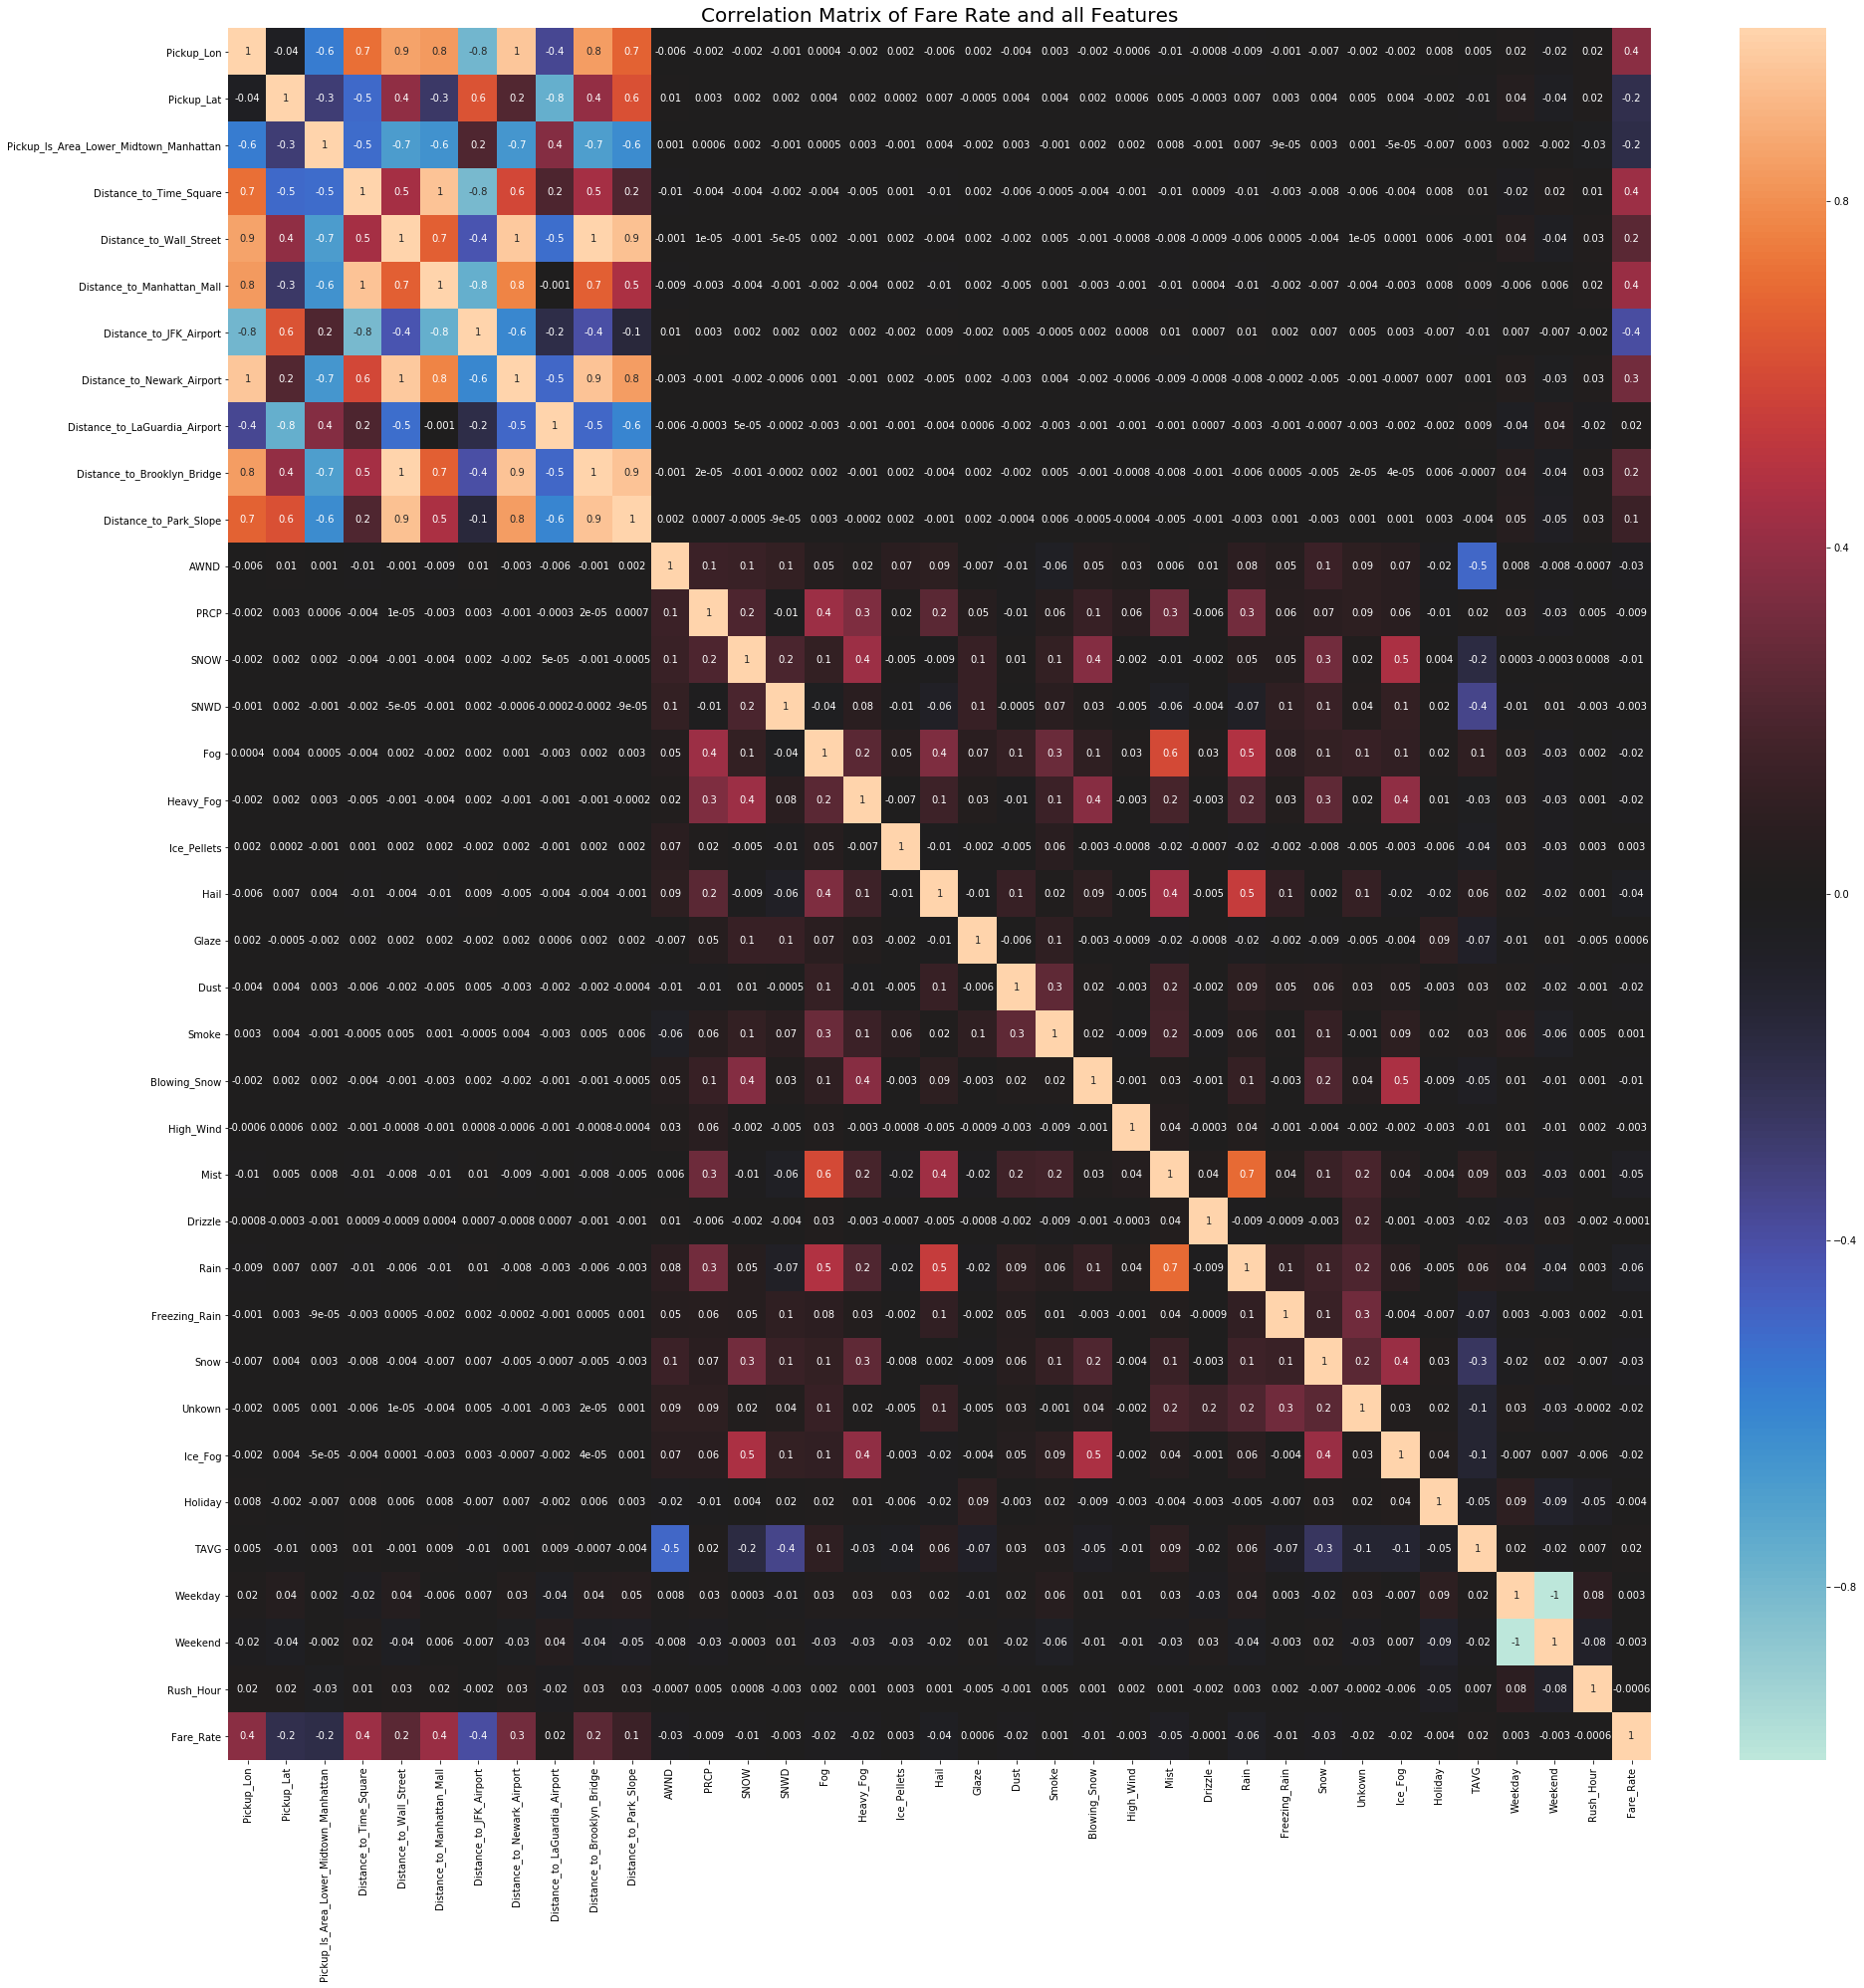

In [62]:
# Plot Heatmap
plt.figure(figsize=(32,32))
corr = sns.heatmap(trip_weather_holiday_data.corr(), annot = True, vmin=-1, vmax=1, center=0.0, fmt='.1g')
plt.title('Correlation Matrix of Fare Rate and all Features',fontsize=20)

### Transforming Dataframe



In [63]:
# Convert each Metric Column to between 0 and 1
numeric_columns=trip_weather_holiday_data[["Pickup_Lon","Pickup_Lat","TAVG","AWND","PRCP","SNOW","SNWD","Distance_to_Time_Square","Distance_to_Wall_Street","Distance_to_Manhattan_Mall","Distance_to_JFK_Airport","Distance_to_Newark_Airport","Distance_to_LaGuardia_Airport","Distance_to_Brooklyn_Bridge","Distance_to_Park_Slope"]]
scaler=MinMaxScaler()
trip_weather_holiday_data[["Pickup_Lon","Pickup_Lat","TAVG","AWND","PRCP","SNOW","SNWD","Distance_to_Time_Square","Distance_to_Wall_Street","Distance_to_Manhattan_Mall","Distance_to_JFK_Airport","Distance_to_Newark_Airport","Distance_to_LaGuardia_Airport","Distance_to_Brooklyn_Bridge","Distance_to_Park_Slope"]]=scaler.fit_transform(numeric_columns)

In [64]:
trip_weather_holiday_data.head()

,Pickup_Lon,Pickup_Lat,zone_pickup,borough_pickup,Pickup_Year,Pickup_Month,Pickup_Day,Pickup_Weekday,Pickup_Hour,Pickup_Is_Area_Lower_Midtown_Manhattan,Distance_to_Time_Square,Distance_to_Wall_Street,Distance_to_Manhattan_Mall,Distance_to_JFK_Airport,Distance_to_Newark_Airport,Distance_to_LaGuardia_Airport,Distance_to_Brooklyn_Bridge,Distance_to_Park_Slope,AWND,PRCP,SNOW,SNWD,Fog,Heavy_Fog,Ice_Pellets,Hail,Glaze,Dust,Smoke,Blowing_Snow,High_Wind,Mist,Drizzle,Rain,Freezing_Rain,Snow,Unkown,Ice_Fog,Holiday,TAVG,Season,Weekday,Weekend,Time_Of_Day,Rush_Hour,Fare_Rate
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
110742,0.516537,0.720913,Bloomingdale,Manhattan,2009,1,1,Thursday,0,False,0.143239,0.395920,0.183266,0.575615,0.471588,0.187614,0.369829,0.522772,0.485104,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.155172,Winter,True,False,Night,False,4
107744,0.489562,0.658622,Central Park,Manhattan,2009,1,1,Thursday,0,True,0.056024,0.290599,0.093126,0.548063,0.398493,0.204752,0.267055,0.420986,0.485104,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.155172,Winter,True,False,Night,False,3
210569,0.521126,0.637585,Lenox Hill West,Manhattan,2009,1,1,Thursday,0,True,0.066121,0.282045,0.095766,0.507504,0.422115,0.173363,0.251947,0.392810,0.485104,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.155172,Winter,True,False,Night,False,1
241310,0.458364,0.588833,Penn Station/Madison Sq West,Manhattan,2009,1,1,Thursday,0,True,0.042269,0.172367,0.009426,0.528622,0.321470,0.249090,0.153664,0.311744,0.485104,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.155172,Winter,True,False,Night,False,3
123511,0.483521,0.661797,Lincoln Square East,Manhattan,2009,1,1,Thursday,0,False,0.057586,0.292279,0.094569,0.555223,0.393771,0.211083,0.269928,0.425765,0.485104,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.155172,Winter,True,False,Night,False,1


In [65]:
# Convert all Boolean Column to Category for One Hot Coding
trip_weather_holiday_data[["Holiday","Weekday","Weekend","Rush_Hour","Pickup_Hour","Pickup_Is_Area_Lower_Midtown_Manhattan","Rain","Freezing_Rain","Fog","Heavy_Fog","Snow","Blowing_Snow","Ice_Pellets","Hail","Glaze","Dust","Smoke","High_Wind","Mist","Drizzle","Unkown","Ice_Fog"]] = trip_weather_holiday_data[["Holiday","Weekday","Weekend","Rush_Hour","Pickup_Hour","Pickup_Is_Area_Lower_Midtown_Manhattan","Rain","Freezing_Rain","Fog","Heavy_Fog","Snow","Blowing_Snow","Ice_Pellets","Hail","Glaze","Dust","Smoke","High_Wind","Mist","Drizzle","Unkown","Ice_Fog"]].astype('category')

In [66]:
# Convert all Category Columns to One Hot Code
trip_weather_holiday_data_transformed=pd.get_dummies(trip_weather_holiday_data)

In [67]:
trip_weather_holiday_data_transformed.head()

,Pickup_Lon,Pickup_Lat,Distance_to_Time_Square,Distance_to_Wall_Street,Distance_to_Manhattan_Mall,Distance_to_JFK_Airport,Distance_to_Newark_Airport,Distance_to_LaGuardia_Airport,Distance_to_Brooklyn_Bridge,Distance_to_Park_Slope,AWND,PRCP,SNOW,SNWD,TAVG,Fare_Rate,zone_pickup_Allerton/Pelham Gardens,zone_pickup_Alphabet City,zone_pickup_Arrochar/Fort Wadsworth,zone_pickup_Astoria,zone_pickup_Astoria Park,zone_pickup_Auburndale,zone_pickup_Baisley Park,zone_pickup_Bath Beach,zone_pickup_Battery Park,zone_pickup_Battery Park City,zone_pickup_Bay Ridge,zone_pickup_Bay Terrace/Fort Totten,zone_pickup_Bayside,zone_pickup_Bedford,zone_pickup_Bedford Park,zone_pickup_Bellerose,zone_pickup_Belmont,zone_pickup_Bensonhurst East,zone_pickup_Bensonhurst West,zone_pickup_Bloomfield/Emerson Hill,zone_pickup_Bloomingdale,zone_pickup_Boerum Hill,zone_pickup_Borough Park,zone_pickup_Briarwood/Jamaica Hills,zone_pickup_Brighton Beach,zone_pickup_Broad Channel,zone_pickup_Bronx Park,zone_pickup_Bronxdale,zone_pickup_Brooklyn Heights,zone_pickup_Brooklyn Navy Yard,zone_pickup_Brownsville,zone_pickup_Bushwick North,zone_pickup_Bushwick South,zone_pickup_Cambria Heights,zone_pickup_Canarsie,zone_pickup_Carroll Gardens,zone_pickup_Central Harlem,zone_pickup_Central Harlem North,zone_pickup_Central Park,zone_pickup_Charleston/Tottenville,zone_pickup_Chinatown,zone_pickup_Claremont/Bathgate,zone_pickup_Clinton East,zone_pickup_Clinton Hill,zone_pickup_Clinton West,zone_pickup_Co-Op City,zone_pickup_Cobble Hill,zone_pickup_College Point,zone_pickup_Columbia Street,zone_pickup_Coney Island,zone_pickup_Corona,zone_pickup_Country Club,zone_pickup_Crotona Park,zone_pickup_Crotona Park East,zone_pickup_Crown Heights North,zone_pickup_Crown Heights South,zone_pickup_Cypress Hills,zone_pickup_DUMBO/Vinegar Hill,zone_pickup_Douglaston,zone_pickup_Downtown Brooklyn/MetroTech,zone_pickup_Dyker Heights,zone_pickup_East Chelsea,zone_pickup_East Concourse/Concourse Village,zone_pickup_East Elmhurst,zone_pickup_East Flatbush/Farragut,zone_pickup_East Flatbush/Remsen Village,zone_pickup_East Flushing,zone_pickup_East Harlem North,zone_pickup_East Harlem South,zone_pickup_East New York,zone_pickup_East New York/Pennsylvania Avenue,zone_pickup_East Tremont,zone_pickup_East Village,zone_pickup_East Williamsburg,zone_pickup_Eastchester,zone_pickup_Elmhurst,zone_pickup_Elmhurst/Maspeth,zone_pickup_Erasmus,zone_pickup_Far Rockaway,zone_pickup_Financial District North,zone_pickup_Financial District South,zone_pickup_Flatbush/Ditmas Park,zone_pickup_Flatiron,zone_pickup_Flatlands,zone_pickup_Flushing,zone_pickup_Flushing Meadows-Corona Park,zone_pickup_Fordham South,zone_pickup_Forest Hills,zone_pickup_Forest Park/Highland Park,zone_pickup_Fort Greene,zone_pickup_Fresh Meadows,zone_pickup_Freshkills Park,zone_pickup_Garment District,zone_pickup_Glen Oaks,zone_pickup_Glendale,zone_pickup_Governor's Island/Ellis Island/Liberty Island,zone_pickup_Gowanus,zone_pickup_Gramercy,zone_pickup_Gravesend,zone_pickup_Green-Wood Cemetery,zone_pickup_Greenpoint,zone_pickup_Greenwich Village North,zone_pickup_Greenwich Village South,zone_pickup_Grymes Hill/Clifton,zone_pickup_Hamilton Heights,zone_pickup_Hammels/Arverne,zone_pickup_Heartland Village/Todt Hill,zone_pickup_Highbridge,zone_pickup_Highbridge Park,zone_pickup_Hillcrest/Pomonok,zone_pickup_Hollis,zone_pickup_Homecrest,zone_pickup_Howard Beach,zone_pickup_Hudson Sq,zone_pickup_Hunts Point,zone_pickup_Inwood,zone_pickup_Inwood Hill Park,zone_pickup_JFK Airport,zone_pickup_Jackson Heights,zone_pickup_Jamaica,zone_pickup_Jamaica Bay,zone_pickup_Jamaica Estates,zone_pickup_Kensington,zone_pickup_Kew Gardens,zone_pickup_Kew Gardens Hills,zone_pickup_Kingsbridge Heights,zone_pickup_Kips Bay,zone_pickup_LaGuardia Airport,zone_pickup_Laurelton,zone_pickup_Lenox Hill East,zone_pickup_Lenox Hill West,zone_pickup_Lincoln Square East,zone_pickup_Lincoln Square West,zone_pickup_Little Italy/NoLiTa,zone_pickup_Long Island City/Hunters Point,zo

In [68]:
trip_weather_holiday_data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1895378 entries, 110742 to 1886758
Columns: 408 entries, Pickup_Lon to Rush_Hour_True
dtypes: float64(15), uint8(393)
memory usage: 1021.7 MB


In [69]:
# Convert to parquet for quick reloading
# Set Path for Parquet Files
path="F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/7_Transformed_Data"
trip_weather_holiday_data_transformed.to_parquet(os.path.join(path, "With_Feature_Engineering_External_Data" + "." + "parquet"),engine="fastparquet")

### With Feature Engineering and Without External Data

In [70]:
trip_Feature_data_transformed=trip_weather_holiday_data_transformed.drop(["Holiday_False","Holiday_True","Rain_False","Rain_True","Freezing_Rain_False","Freezing_Rain_True","Fog_False","Fog_True","Heavy_Fog_False","Heavy_Fog_True","Snow_False","Snow_True","Blowing_Snow_False","Blowing_Snow_True","Ice_Pellets_False","Ice_Pellets_True","Hail_False","Hail_True","Glaze_False","Glaze_True","Dust_False","Dust_True","Smoke_False","Smoke_True","High_Wind_False","High_Wind_True","Mist_False","Mist_True","Drizzle_False","Drizzle_True","Unkown_False","Unkown_True","Ice_Fog_False","Ice_Fog_True"], axis=1)

In [71]:
# Convert to parquet for quick reloading
# Set Path for Parquet Files
path="F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/7_Transformed_Data"
trip_Feature_data_transformed.to_parquet(os.path.join(path, "With_Feature_Engineering" + "." + "parquet"),engine="fastparquet")